### Some Basic Quantum Circuits 

In [ ]:
!pip3 install qiskit 
# !pip install pylatexenc

     |████████████████████████████████| 8.3MB 2.3MB/s 
     |████████████████████████████████| 16.5MB 254kB/s 
     |████████████████████████████████| 194kB 36.5MB/s 
     |████████████████████████████████| 174kB 49.0MB/s 
     |████████████████████████████████| 1.9MB 37.8MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 1.1MB 43.8MB/s 
     |████████████████████████████████| 5.8MB 42.1MB/s 
     |████████████████████████████████| 296kB 41.3MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 583kB 42.5MB/s 
     |████████████████████████████████| 102kB 9.5MB/s 
     |████████████████████████████████| 2.6MB 36.1MB/s 
     |████████████████████████████████| 5.5MB 42.3MB/s 
  Created wheel for qiskit: filename=qiskit-0.22.0-cp36-none-any.whl size=2875 sha256=b28e73e3c8b180ea4f5a847bec9a4a6fbfe2e7050fb17aa0d91a17f24edab859
  Stored in directory: /root/.cache/pip/wheels/d6/8a/b6/044467205b02bed

In [ ]:
import qiskit as q
import matplotlib.pyplot as plt

In [ ]:
qr = q.QuantumRegister(2)
cr = q.ClassicalRegister(2)

circuit = q.QuantumCircuit(qr, cr)
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/


Before we have created an example entangled state $(\beta _{00})$ as below -- 
1. Start of with a Hadamard gate 
2. Apply a CNOT gate with control bit as the superposition state (from Hadamard). 

_First Circuit_:

First experiment -- instead of one qubit in superposition we apply two hadamard gates and then apply CNOT gate. 

In [ ]:
circuit.h(qr[0]) # apply hadamard gate on first qubit. 
circuit.h(qr[1]) # apply hadamard gate on second qubit. 
# apply cnot gate. 
circuit.cx(qr[0], qr[1]) # in qiskit cnot-- first bit is set as control bit and second as target bit. 
display(circuit.draw())

┌───┐     
q0_0: ┤ H ├──■──
      ├───┤┌─┴─┐
q0_1: ┤ H ├┤ X ├
      └───┘└───┘
c0: 2/══════════

#### What we are expecting at this stage ?

Initial stages of the qubits are always zero unless they are initialized to a different state. So H gate acting on stage $|0\rangle$ would give $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$. Since there are 2 H gates acting on stage $|0\rangle$ we have the output as tensor product of $|+\rangle \otimes |+\rangle = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) $. The CNOT gate is acting on this stage,  so we don't see any change. So CX $|++\rangle = |++\rangle$. These 4 states should be present in equal probability.     

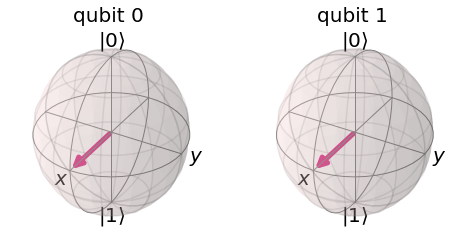

In [ ]:
#### see the state-vector 
statevec = q.Aer.get_backend('statevector_simulator')
final_state = q.execute(circuit, statevec).result().get_statevector()
q.visualization.plot_bloch_multivector(final_state) # the state doesn't not change after application of the CNOT gate 

#### We see above that both qubits are in $|+\rangle$ state. 

In [ ]:
circuit.measure(qr, cr)
circuit.draw(scale=2)

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      ├───┤┌─┴─┐└╥┘┌─┐
q0_1: ┤ H ├┤ X ├─╫─┤M├
      └───┘└───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

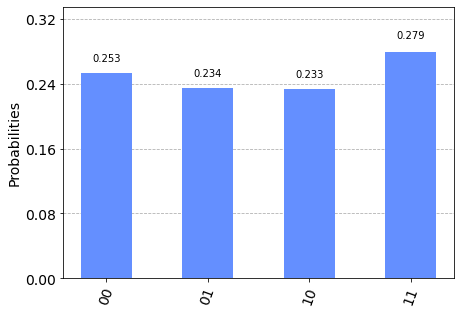

In [ ]:
#### simulate result on a local computer 

simulator = q.Aer.get_backend(name='qasm_simulator')
results = q.execute(circuit, backend=simulator, ).result()
q.visualization.plot_histogram(results.get_counts(circuit)) 

_2nd Circuit_:

We check our understanding now by applying an X gate before the application of H gate. 

So now one H gate is applied to state $|0\rangle$ and the other is applied to $X|0\rangle \equiv |1\rangle$ state. 

The tensor product will be between $|+\rangle \otimes |-\rangle = \frac{1}{2}\left(|00\rangle - |01\rangle + |10\rangle - |11\rangle\right)$. Applying a CX gate to this stage will change the state vector. 

$CX (|+\rangle \otimes |-\rangle ) = \frac{1}{2}\left(|00\rangle - |01\rangle - |10\rangle + |11\rangle \right)$. 

This is equivalent to $|-\rangle \otimes |-\rangle $. 

Measuring the probability will give the same result as before, all the 4 states are present with equal probability.  

In [ ]:
### try a different circuit where we apply X gate before applying H gate. 

qr1 = q.QuantumRegister(2)
cr1 = q.ClassicalRegister(2)

circuit1 = q.QuantumCircuit(qr1, cr1)
# circuit1.draw()


circuit1.h(qr1[0]) # apply the H gate on q0
circuit1.x(qr1[1]) # apply Not gate on q_1
circuit1.h(qr1[1]) # add H gate on q_1
circuit1.cx(qr1[0], qr1[1]) # apply cx gate with control bit at 0th index 

### draw the circuit
circuit1.draw()

┌───┐          
q6_0: ┤ H ├───────■──
      ├───┤┌───┐┌─┴─┐
q6_1: ┤ X ├┤ H ├┤ X ├
      └───┘└───┘└───┘
c1: 2/═══════════════

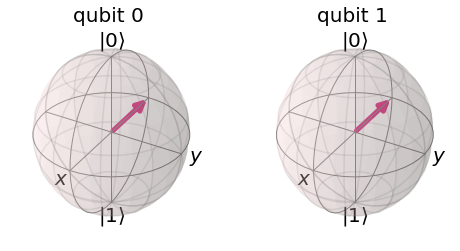

In [ ]:
#### plt the state vector 

statevec1 = q.Aer.get_backend('statevector_simulator')
final_state1 = q.execute(circuit1, statevec1).result().get_statevector()
q.visualization.plot_bloch_multivector(final_state1) # the state doesn't not change after application of the CNOT gate 
#### unchanged state as expected 

#### We see above both the qubits are in $|-\rangle$ state.



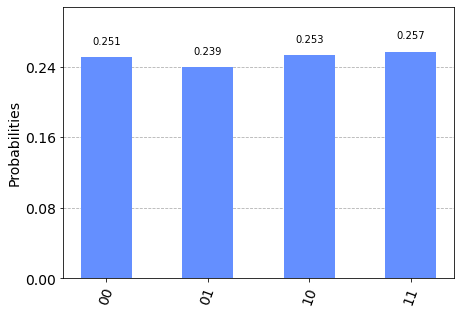

In [ ]:
circuit1.measure(qr1, cr1)
### simulate result on local computer 
simulator1 = q.Aer.get_backend('qasm_simulator')
results1 = q.execute(circuit1, backend=simulator1, ).result()
q.visualization.plot_histogram(results1.get_counts(circuit1)) 

_3rd Circuit_:

Here we make a little tweak to the previous circuit. Instead of applying the X-gate to to qubit 1, we apply it to qubit 0.  

This is again for sanity check, compared to the previous circuit. 

In [ ]:
### try a different circuit where we apply X gate before applying H gate. 
### but we do this for first qubit. 

qr2 = q.QuantumRegister(2)
cr2 = q.ClassicalRegister(2)

circuit2 = q.QuantumCircuit(qr2, cr2)
# circuit2.draw()
circuit2.x(qr2[0])
circuit2.h(qr2[0])
circuit2.h(qr2[1])
circuit2.cx(qr2[0], qr2[1])
circuit2.draw()

┌───┐┌───┐     
q11_0: ┤ X ├┤ H ├──■──
       ├───┤└───┘┌─┴─┐
q11_1: ┤ H ├─────┤ X ├
       └───┘     └───┘
 c2: 2/═══════════════

What we have now is the 0th qubit is in state $|1\rangle$ state after the X-gate is applier and then the H gate is applied. 

Before the CX gate our system is in this state-- 
$|-\rangle \otimes |+\rangle =|-+\rangle =\frac{1}{2}\left(|00\rangle + |01\rangle - |10\rangle - |11\rangle\right)$. Here we apply the CX gate -- Our state won't change 

$\frac{1}{2} \left(|00\rangle + |01\rangle - |10\rangle  -|11\rangle \right) = |-+\rangle$ 


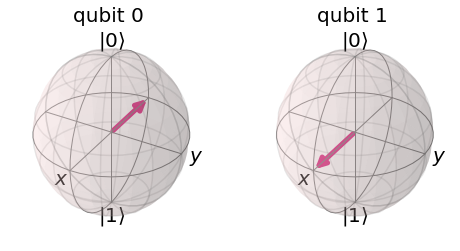

In [ ]:
#### plt the state vector 

statevec2 = q.Aer.get_backend('statevector_simulator')
final_state2 = q.execute(circuit2, statevec2).result().get_statevector()
q.visualization.plot_bloch_multivector(final_state2) 

#### We see above one qubit is in state $|-\rangle$ and another in $|+\rangle$. 

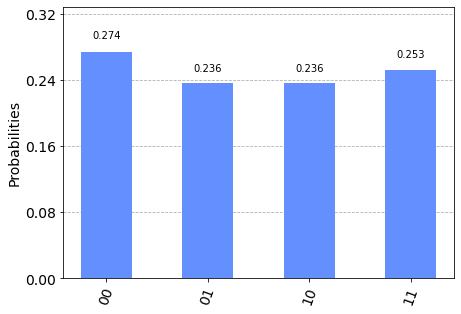

In [ ]:
circuit2.measure(qr2, cr2)
### simulate result on local computer 
simulator2 = q.Aer.get_backend('qasm_simulator')
results2 = q.execute(circuit2, backend=simulator1, ).result()
q.visualization.plot_histogram(results2.get_counts(circuit2)) 

##### Phase Kickback

Phase Kickback is one very important concept in quantum computing. To fully understand and comprehend it, we will proceed step by step. 
First let's study some more circuits to get accustomed. 

Let's start of with adding an H gate after the CX gate in the first circuit we studied.  

-----------------------------------

#### 4th Circuit: 

In [ ]:
qr3 = q.QuantumRegister(2)
cr3 = q.ClassicalRegister(2)

circuit3 = q.QuantumCircuit(qr3, cr3)
# circuit3.draw()

circuit3.h(qr3[0])
circuit3.h(qr3[1])
## apply hadamard gates to both qubits. 
circuit3.cx(qr3[0], qr3[1])
## till this is first circuit. Now we add one more H gate. 
circuit3.h(qr3[0])
circuit3.draw(scale=2)

┌───┐     ┌───┐
q19_0: ┤ H ├──■──┤ H ├
       ├───┤┌─┴─┐└───┘
q19_1: ┤ H ├┤ X ├─────
       └───┘└───┘     
 c3: 2/═══════════════

We have seen before results till the CX gate. Two H gates will create $|++\rangle$ state and CX gate won't change the state of the system. 

Now we have added another H gate to the first qubit.  So, $H|++\rangle$ will create a $|+0\rangle$ state because, application of H gate to $|+\rangle$ state takes back to $|0\rangle$ state. 

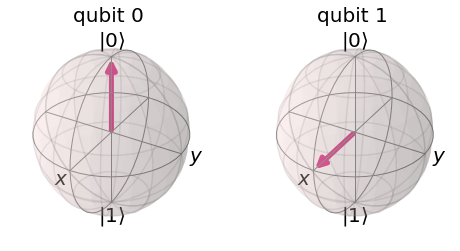

In [ ]:
### plot the state vector 

statevec3 = q.Aer.get_backend('statevector_simulator')
final_state3 = q.execute(circuit3, statevec3).result().get_statevector()
q.visualization.plot_bloch_multivector(final_state3)  

#### We see above one qubit is in $|0\rangle$ state and another is in $|+\rangle$ state. 


The tensor product will create $ |0\rangle + |1\rangle  \otimes |0\rangle$ states. 

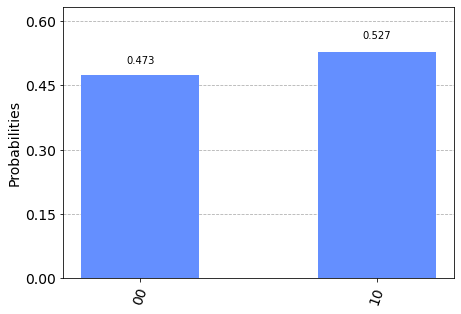

In [ ]:
# let's simulate this on local computer 

circuit3.measure(qr3, cr3)
### simulate result on local computer 
simulator3 = q.Aer.get_backend('qasm_simulator')
results3 = q.execute(circuit3, backend=simulator3, ).result()
q.visualization.plot_histogram(results3.get_counts(circuit3)) 

#### 5th Circuit: 

Just for sanity check, instead of applying the H gate to the first qubit, we apply it to the second qubit (compared with previous circuit). 

Here we expect to find $|00\rangle + |01\rangle$ state at the end. 

In [ ]:
qr4 = q.QuantumRegister(2)
cr4 = q.ClassicalRegister(2)

circuit4 = q.QuantumCircuit(qr4, cr4)

circuit4.h(qr4[0])
circuit4.h(qr4[1])
## apply hadamard gates to both qubits. 
circuit4.cx(qr4[0], qr4[1])
## till this is first circuit. Now we add one more H gate. 
circuit4.h(qr4[1]) # but now apply the H gate to the second qubit. 
circuit4.draw(scale=2)

┌───┐          
q28_0: ┤ H ├──■───────
       ├───┤┌─┴─┐┌───┐
q28_1: ┤ H ├┤ X ├┤ H ├
       └───┘└───┘└───┘
 c4: 2/═══════════════

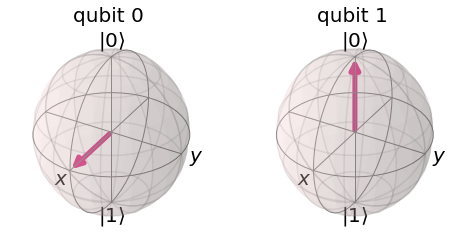

In [ ]:
### plot the state vector 

statevec4 = q.Aer.get_backend('statevector_simulator')
final_state4 = q.execute(circuit4, statevec4).result().get_statevector()
q.visualization.plot_bloch_multivector(final_state4)  

#### We see above one qubit is in $|+\rangle$ state and the other is in $|0\rangle$ state. 

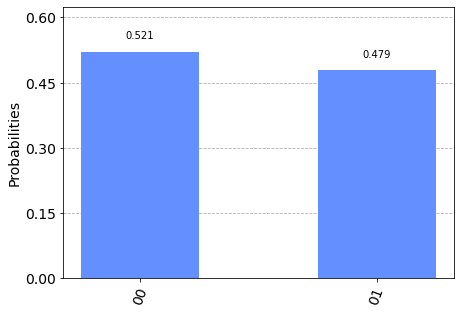

In [ ]:
# let's simulate this on local computer 

circuit4.measure(qr4, cr4)
### simulate result on local computer 
simulator4 = q.Aer.get_backend('qasm_simulator')
results4 = q.execute(circuit4, backend=simulator4, ).result()
q.visualization.plot_histogram(results4.get_counts(circuit4))  ### !!! great !!! as expected 